In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
rcParams['figure.figsize'] = (12,12)
rcParams['image.cmap']='gray'
rcParams['image.interpolation']='nearest'

In [4]:
fns = glob.glob('/home/pmcroot/data4/2016-10-04_135mm_focus_test_100_ms_sim_sky//*.npz')
fns.sort()

In [5]:
len(fns)

8874

In [47]:
fns[90]

'/home/pmcroot/data4/2016-10-04_135mm_focus_test_100_ms_sim_sky/2016-10-04_234535_focus_step_1993.npz'

In [48]:
d = np.load(fns[90])['image']

In [7]:
import scipy.ndimage

In [8]:
scipy.ndimage.sobel()

TypeError: sobel() takes at least 1 argument (0 given)

<IPython.core.display.Javascript object>


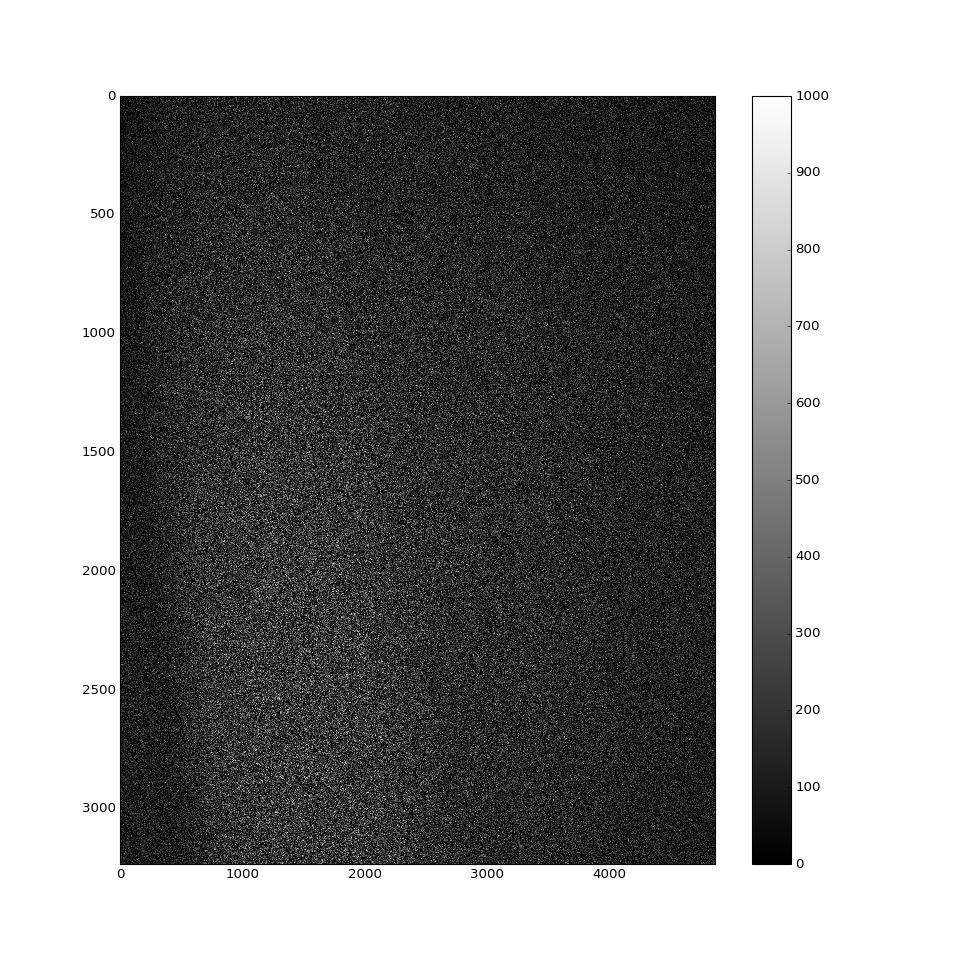

In [49]:
figure()
imshow((np.abs(scipy.ndimage.sobel(d.astype('float')))),interpolation='nearest',aspect='auto')
colorbar()
clim(0,1000)

<IPython.core.display.Javascript object>


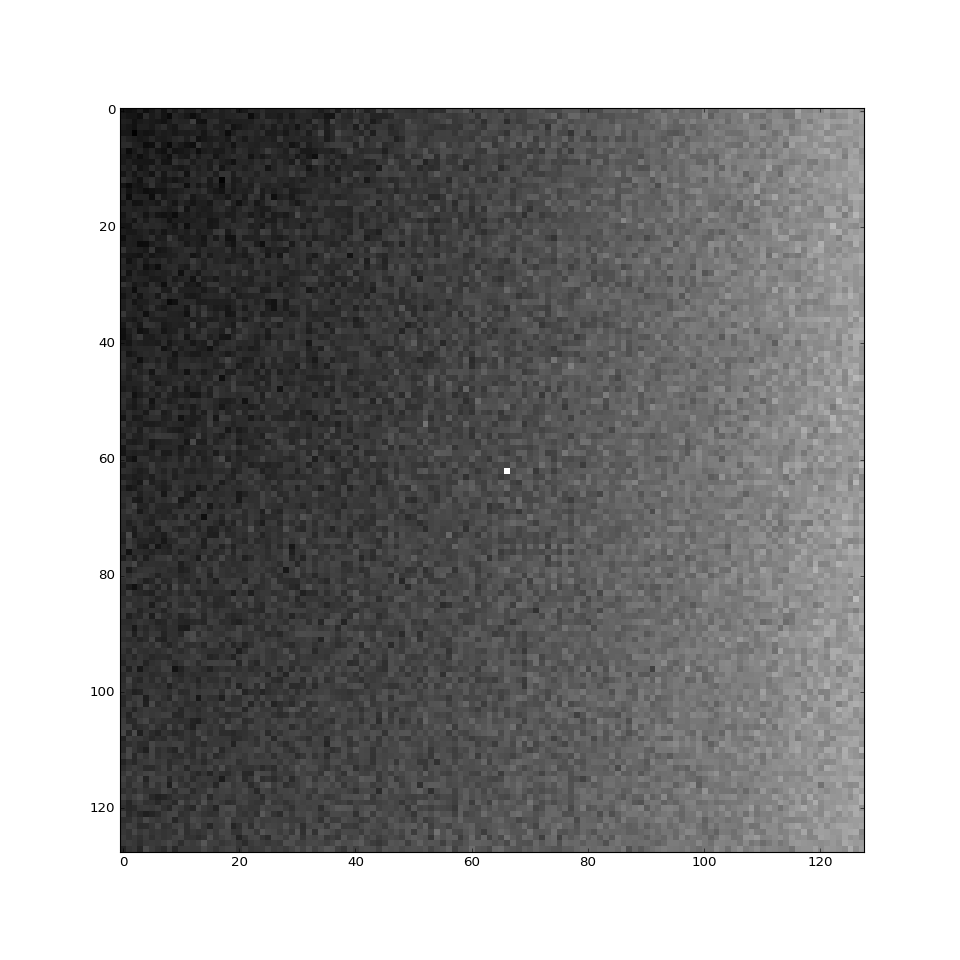

In [55]:
figure()
x,y = 720*2,73*2
imshow(d[x-64:x+64,y-64:y+64])

<IPython.core.display.Javascript object>


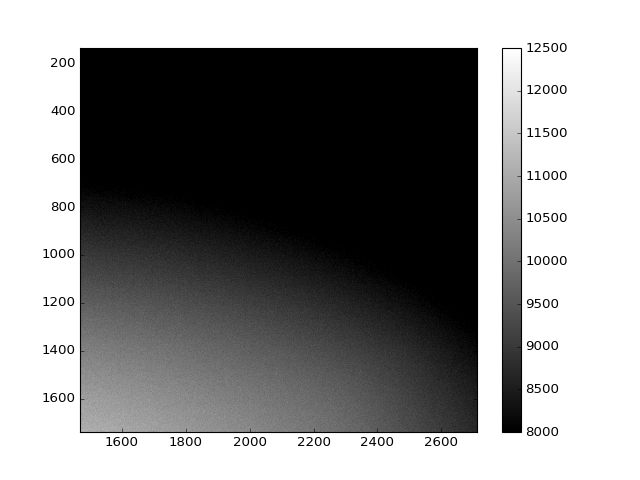

In [84]:
figure()
imshow(d,interpolation='nearest',aspect='auto')
colorbar()
clim(8000,12500)

In [23]:
(4864//128)

38

In [50]:
cells = d[:3200,:].reshape((25,128,-1,128)).astype('float')

In [51]:
mesas = np.zeros_like(cells)

for cx in range(cells.shape[0]):
    for cy in range(cells.shape[2]):
        z0 = cells[cx,0,cy,0]
        zx = cells[cx,-1,cy,0]-z0
        zy = cells[cx,0,cy,-1]-z0
        mesas[cx,:,cy,:] = np.linspace(0,zx,128)[:,None]+np.linspace(0,zy,128)[None,:]+z0

In [52]:
cn = cells-mesas

<IPython.core.display.Javascript object>


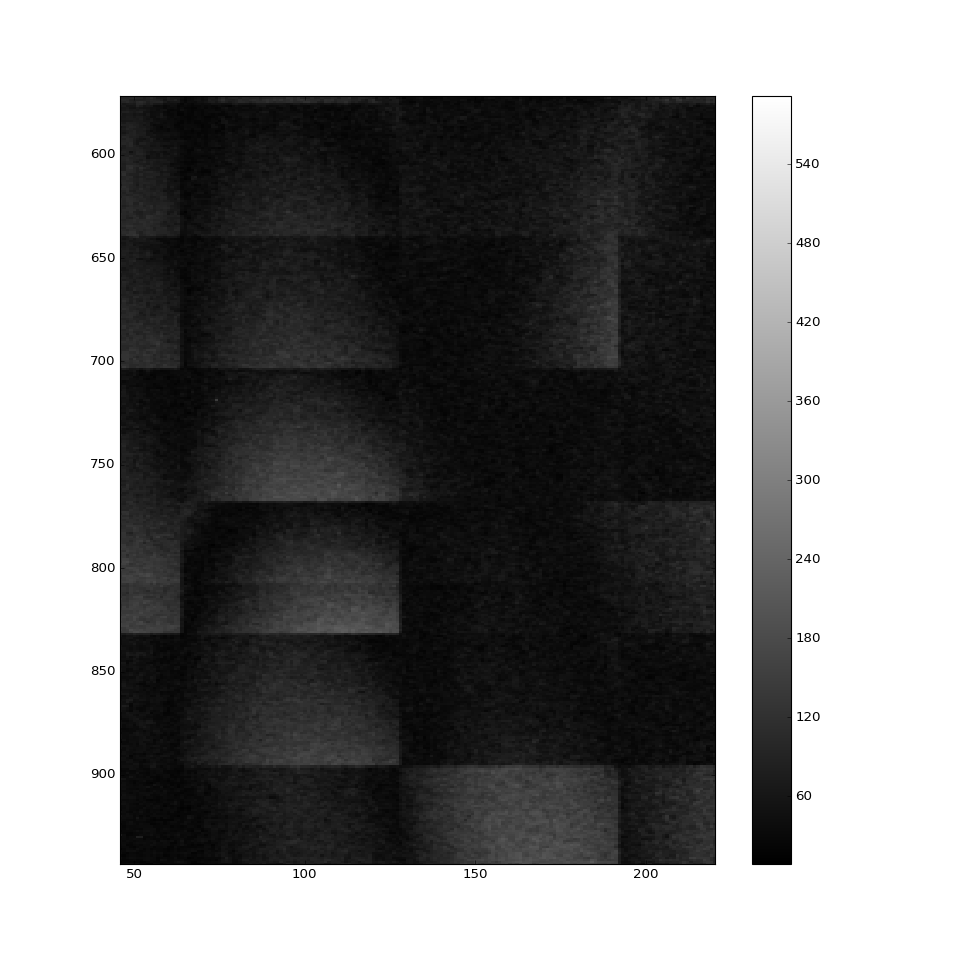

In [53]:
figure()
imshow(scipy.ndimage.gaussian_filter(np.abs(cn.reshape((3200,4864))),1)[::2,::2],aspect='auto')
colorbar()
#clim(0,80)

<IPython.core.display.Javascript object>


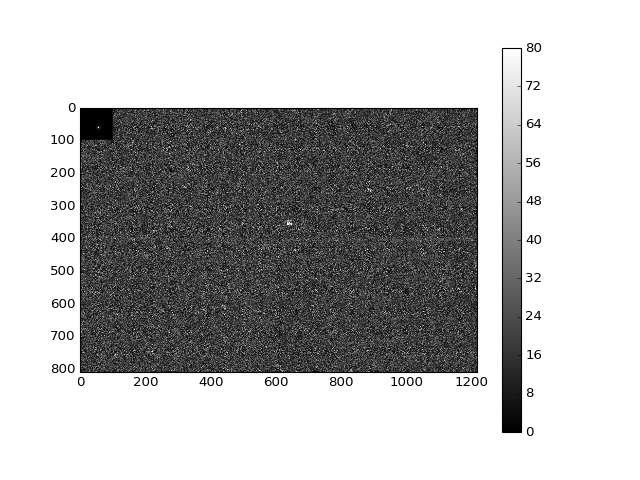

In [93]:
figure()
imshow((np.abs(cn.reshape((3232,4864))))[::4,::4],aspect='auto')
colorbar()
clim(0,80)

In [23]:
np.unravel_index(d.argmax(),d.shape)

(1411, 2555)

In [94]:
imshow(d[1350:1450,2500:2600],interpolation='nearest')

In [26]:
fns[100]

'/home/pmcroot/data2/2016-09-27_135mm_star_focus_test_100ms_no_sim_sky_brightness_round2/2016-09-28_000726_focus_step_0000.npz'

In [31]:
stamps = []
for fn in fns[100:120]:
    d = np.load(fn)['image']
    #x,y = np.unravel_index(d.argmax(),d.shape)
    #print x,y
    x,y = 1406,2559
    stamps.append(d[x-32:x+32,y-32:y+32])
stamps = np.array(stamps)

In [28]:
stamps.shape

(20, 128, 128)

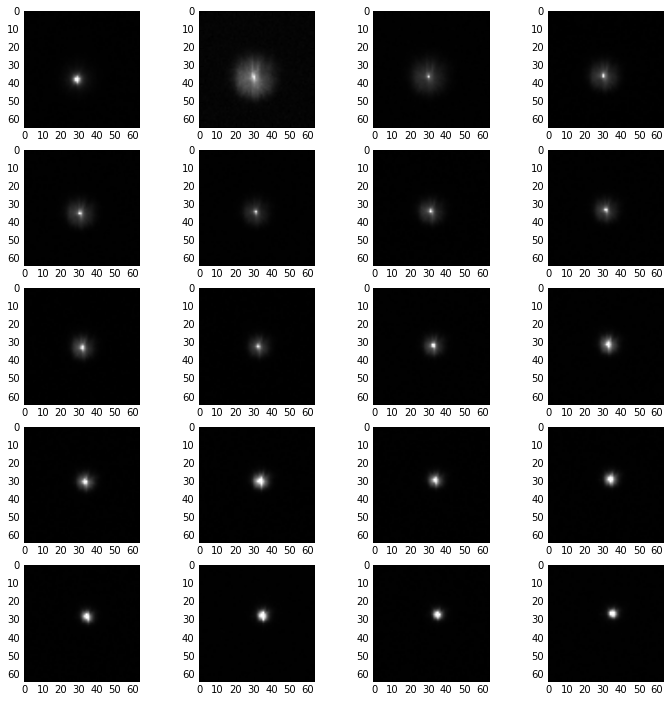

In [32]:
fig,axs = subplots(5,4)
for k,ax in enumerate(axs.flatten()):
    ax.imshow(stamps[k,:,:])

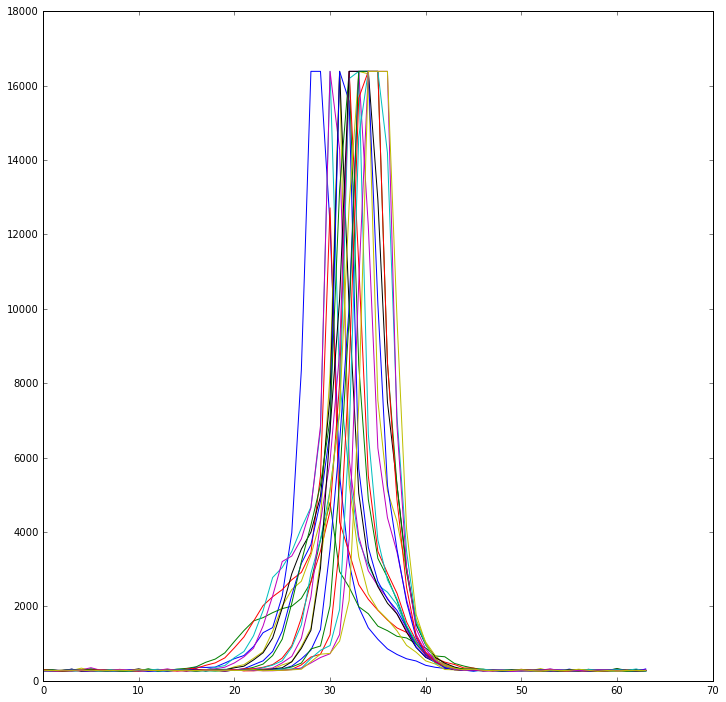

In [39]:
_=plot(stamps.max(1).T)

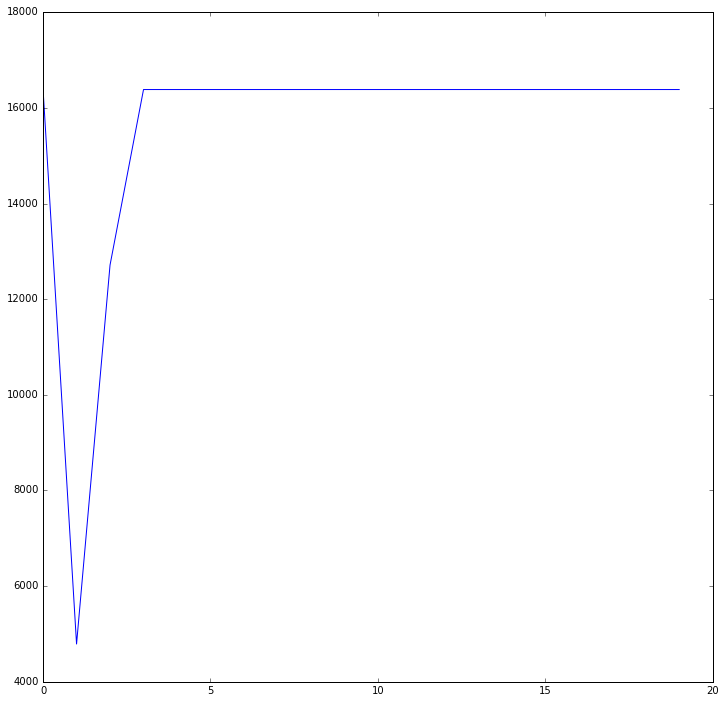

In [40]:
plot(stamps.max(axis=(1,2)))